# Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting The Dataset

In [2]:
dataset = pd.read_excel("crp.xlsx", sheet_name="Sheet1")

In [3]:
dataset

,Year,City,Population (in Lakhs) (2011)+,Murder,Kidnapping,Crime against women,Crime against children,Crime Committed by Juveniles,Crime against Senior Citizen,Crime against SC,Crime against ST,Economic Offences,Cyber Crimes
0,2014,Ahmedabad,63.5,82,367,1371,437,215,68,66,6,399,32
1,2015,Ahmedabad,63.5,94,332,1067,609,157,17,60,9,378,28
2,2016,Ahmedabad,63.5,103,376,1126,481,258,362,96,10,479,77
3,2017,Ahmedabad,63.5,90,263,1405,600,405,534,119,6,608,112
4,2018,Ahmedabad,63.5,98,277,1416,733,352,733,145,9,842,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2017,Surat,45.8,89,332,559,526,436,131,32,10,719,105
148,2018,Surat,45.8,108,373,712,1075,409,161,29,13,829,155
149,2019,Surat,45.8,97,358,1015,770,516,232,34,19,804,228
150,2020,Surat,45.8,116,163,633,419,298,69,20,12,401,204


In [4]:
# Get a summary of the dataset, including data types and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         152 non-null    int64  
 4   Kidnapping                     152 non-null    int64  
 5   Crime against women            152 non-null    int64  
 6   Crime against children         152 non-null    int64  
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   152 non-null    int64  
 9   Crime against SC               152 non-null    int64  
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              152 non-null    int64  
 12  Cyber Crimes                   152 non-null    int

# Dataset Information

*  In this study, the data has been collected from the **National Crime Records Bureau (NCRB)**, India.
*  The data provides statistics on the number of crimes commited in **19 metropolitan cities** during the year **2014 to 2021**.
*  The 19 metropolitan cities are:<br>
    `*  Ahmedabad        *  Bengaluru        *  Chennai   `<br>
    `*  Coimbatore       *  Delhi            *  Ghaziabad `<br>
    `*  Hyderabad        *  Indore           *  Jaipur    `<br>
    `*  Kanpur           *  Kochi            *  Kolkata   `<br>
    `*  Kozhikode        *  Lucknow          *  Mumbai    `<br>
    `*  Nagpur           *  Patna            *  Pune      `<br>
    `*  Surat                                             `<br>
*  It contains the records of the 10 different category of crimes commited namely:<br>
    `*  Murder                               *  Kidnapping                   `<br>
    `*  Crime against women                  *  Crime against children       `<br>
    `*  Crime Committed by Juveniles         *  Crime against Senior Citizen `<br>
    `*  Crime against SC                     *  Crime against ST             `<br>
    `*  Economic Offences                    *  Cyber Crimes                 `<br>

# Data Visualisation

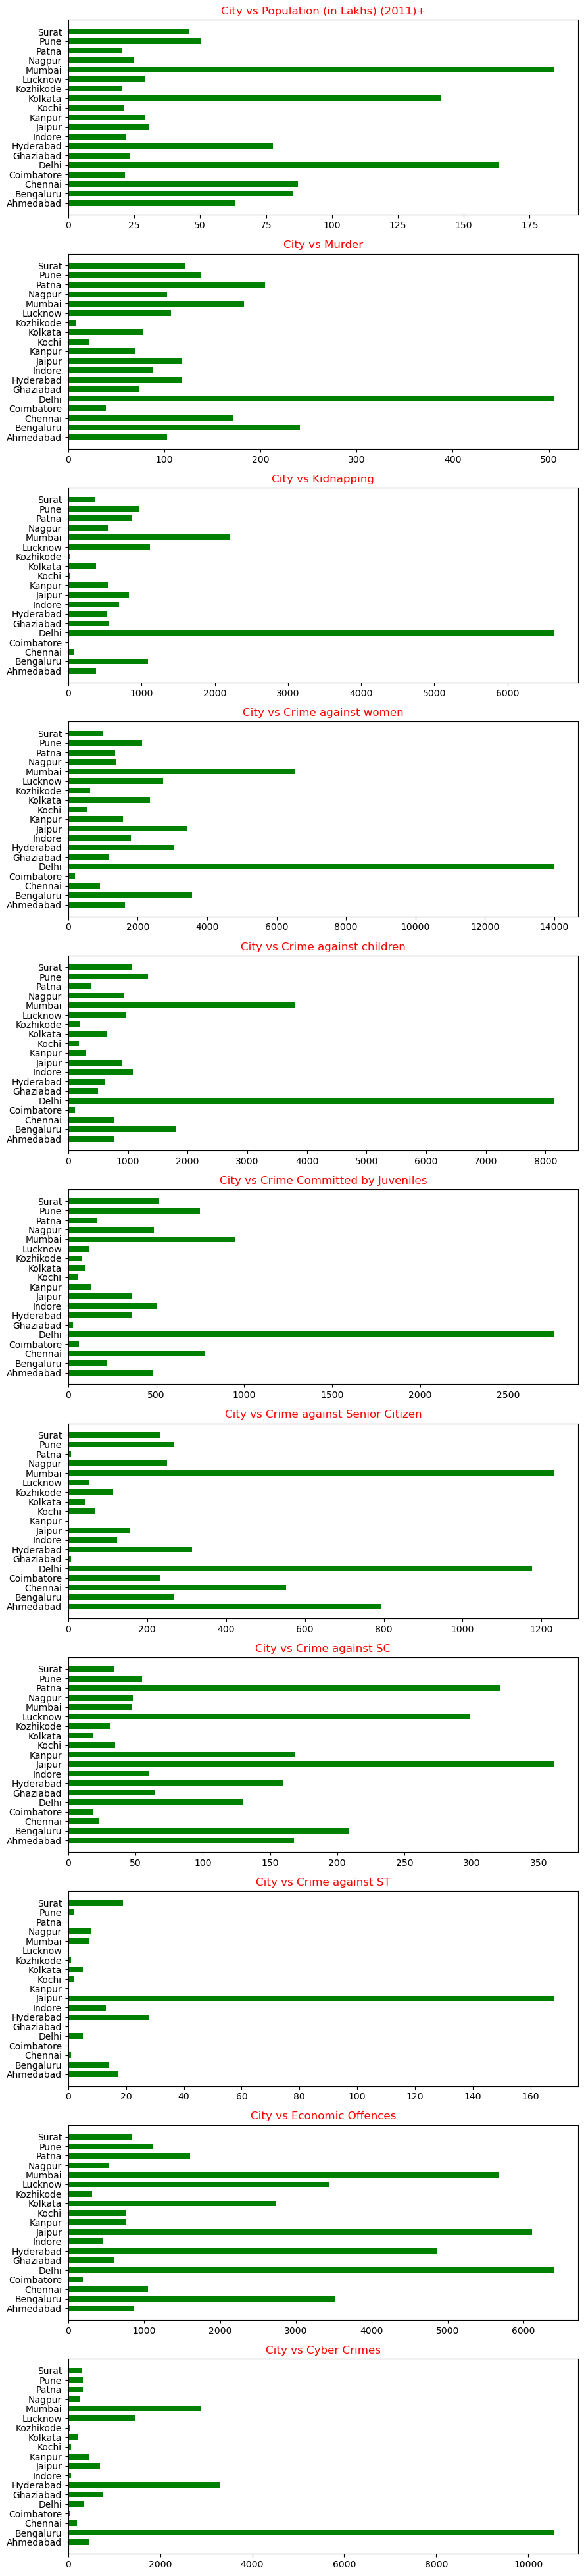

In [5]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))
for i in range(0, 11):
    ax[i].barh(dataset['City'], dataset[dataset.columns[i+2]], 0.6, color='Green')
    ax[i].set_title('City vs ' + dataset.columns[i+2], color='Red')
plt.show()

# New Dataset Creation

In [6]:
# A new DataFrame new_df is initialized with five columns
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
print(new_df)

Empty DataFrame
Columns: [Year, City, Population (in Lakhs) (2011)+, Number Of Cases, Type]
Index: []


In [7]:
for i in range(3, 13):
    temp = dataset[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]
    new_df = pd.concat([new_df, temp])

In [8]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes
148,2018,Surat,45.8,155,Cyber Crimes
149,2019,Surat,45.8,228,Cyber Crimes
150,2020,Surat,45.8,204,Cyber Crimes


# Data Pre-processing

### The number of cases in each crime category column will be transformed into the crime rate per population(in lakhs).
### Crime Rate = Total Crime Cases / Population (in Lakhs)

In [9]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']

In [10]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type,Crime Rate
0,2014,Ahmedabad,63.5,82,Murder,1.291339
1,2015,Ahmedabad,63.5,94,Murder,1.480315
2,2016,Ahmedabad,63.5,103,Murder,1.622047
3,2017,Ahmedabad,63.5,90,Murder,1.417323
4,2018,Ahmedabad,63.5,98,Murder,1.543307
...,...,...,...,...,...,...
147,2017,Surat,45.8,105,Cyber Crimes,2.292576
148,2018,Surat,45.8,155,Cyber Crimes,3.384279
149,2019,Surat,45.8,228,Cyber Crimes,4.978166
150,2020,Surat,45.8,204,Cyber Crimes,4.454148


### As the Number Of Cases Column is not of use, it should be dropped

In [11]:
new_df = new_df.drop(['Number Of Cases'], axis=1)   # Drop Column

In [12]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
147,2017,Surat,45.8,Cyber Crimes,2.292576
148,2018,Surat,45.8,Cyber Crimes,3.384279
149,2019,Surat,45.8,Cyber Crimes,4.978166
150,2020,Surat,45.8,Cyber Crimes,4.454148


In [13]:
# saving the new dataset as an excel file
new_df.to_excel("Dataset/new_dataset.xlsx", index=False, sheet_name ='Sheet1')

# LOADING THE NEW DATASET

In [14]:
new_dataset = pd.read_excel("Dataset/new_dataset.xlsx", sheet_name="Sheet1")

In [15]:
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
1515,2017,Surat,45.8,Cyber Crimes,2.292576
1516,2018,Surat,45.8,Cyber Crimes,3.384279
1517,2019,Surat,45.8,Cyber Crimes,4.978166
1518,2020,Surat,45.8,Cyber Crimes,4.454148


In [16]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.5+ KB


In [17]:
# Calculates Descriptive Statistics
new_dataset.describe()

,Year,Population (in Lakhs) (2011)+,Crime Rate
count,1520.000000,1520.000000,1520.000000
mean,2017.500000,60.015789,11.581238
std,2.292042,50.006465,19.529756
min,2014.000000,20.300000,0.000000
25%,2015.750000,21.700000,0.943396
50%,2017.500000,30.700000,4.065514
75%,2019.250000,85.000000,14.486662
max,2021.000000,184.100000,198.925081


### The data is clean with no null values with column city and type as object/categorical Dtype.

# LABEL ENCODING

#### Since two columns in our dataset has categorical values i.e City and Type.
#### Thus, to make them machine-readable, we must convert them to numeric labels.

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
le = LabelEncoder()  # Initialize the LabelEncoder
new_dataset['City'] = le.fit_transform(new_dataset['City'])  # Fit and transform the 'City' column
mapping = dict(zip(le.classes_, range(len(le.classes_))))  # Create a mapping of original categories to numeric labels

In [21]:
# Saving the mapping file for further use

import os

# Check if the 'Mappings' directory exists, and create it if not
if not os.path.exists('Mappings'):
    os.makedirs('Mappings')

In [22]:
file = open('Mappings/City_Mapping.txt', 'wt')  # Open (or create) a text file in write mode
for key, val in mapping.items():  # Iterate over the items in the mapping dictionary
    print(str(key) + " - " + str(val) + '\n')  # Print the mapping to the console
    file.write(str(key) + " - " + str(val) + '\n')  # Write the mapping to the file
file.close()  # Close the file

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [23]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [24]:
# Saving the mapping file for further use

import os

file = open('Mappings/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [25]:
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,0,63.5,9,1.291339
1,2015,0,63.5,9,1.480315
2,2016,0,63.5,9,1.622047
3,2017,0,63.5,9,1.417323
4,2018,0,63.5,9,1.543307
...,...,...,...,...,...
1515,2017,18,45.8,6,2.292576
1516,2018,18,45.8,6,3.384279
1517,2019,18,45.8,6,4.978166
1518,2020,18,45.8,6,4.454148


# SPLITTING OF DATASET FOR TRAINING / TESTING

In [26]:
x = new_dataset[new_dataset.columns[0:4]].values

In [27]:
x  #independent

array([[2014. ,    0. ,   63.5,    9. ],
       [2015. ,    0. ,   63.5,    9. ],
       [2016. ,    0. ,   63.5,    9. ],
       ...,
       [2019. ,   18. ,   45.8,    6. ],
       [2020. ,   18. ,   45.8,    6. ],
       [2021. ,   18. ,   45.8,    6. ]])

In [28]:
y = new_dataset['Crime Rate'].values

In [29]:
y   #dependent

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#  20% of the dataset will be used for testing, while the remaining 80% will be used for training the model.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [32]:
x_train

array([[2.018e+03, 8.000e+00, 3.070e+01, 1.000e+00],
       [2.015e+03, 1.200e+01, 2.030e+01, 3.000e+00],
       [2.014e+03, 5.000e+00, 2.360e+01, 6.000e+00],
       ...,
       [2.015e+03, 1.200e+01, 2.030e+01, 7.000e+00],
       [2.019e+03, 1.300e+01, 2.900e+01, 9.000e+00],
       [2.014e+03, 1.700e+01, 5.050e+01, 6.000e+00]])

In [33]:
y_train

array([ 5.86319218,  0.98522167,  2.58474576, ..., 12.95566502,
        2.5862069 ,  2.77227723])

# MODEL CREATION

## K-Nearest Neighbour

In [34]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [35]:
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [36]:
x=metrics.mean_absolute_error(y_test, y_pred)
y=metrics.mean_squared_error(y_test, y_pred)
z=metrics.r2_score(y_test, y_pred)

In [37]:
print('Mean Absolute Error:', x)
print('Mean Squared Error:', y)
print('R2 score:', z)

Mean Absolute Error: 6.876644706753223
Mean Squared Error: 140.26760562788874
R2 score: 0.5552415687264878


## Neural Network

In [38]:
from sklearn.neural_network import MLPRegressor


In [39]:
model5 = MLPRegressor(random_state=0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 12.424838196292527
Mean Squared Error: 307.55062475298035
R2 score: 0.02482306737880402


## Decision Tree Regressor

In [41]:
from sklearn import tree

In [42]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [43]:
x=metrics.mean_absolute_error(y_test, y_pred)
y=metrics.mean_squared_error(y_test, y_pred)
z= metrics.r2_score(y_test, y_pred)

In [44]:
print('Mean Absolute Error:', x)
print('Mean Squared Error:', y)
print('R2 score:',z)

Mean Absolute Error: 2.8898431949843437
Mean Squared Error: 34.95845390986383
R2 score: 0.8891542558875257


# Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model4 = RandomForestRegressor(random_state=0)

In [47]:
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [48]:
x=metrics.mean_absolute_error(y_test, y_pred)
y=metrics.mean_squared_error(y_test, y_pred)
z= metrics.r2_score(y_test, y_pred)

In [49]:
print('Mean Absolute Error:', x)
print('Mean Squared Error:', y)
print('R2 score:',z)

Mean Absolute Error: 2.487973049950136
Mean Squared Error: 21.362971441526998
R2 score: 0.9322626088672231


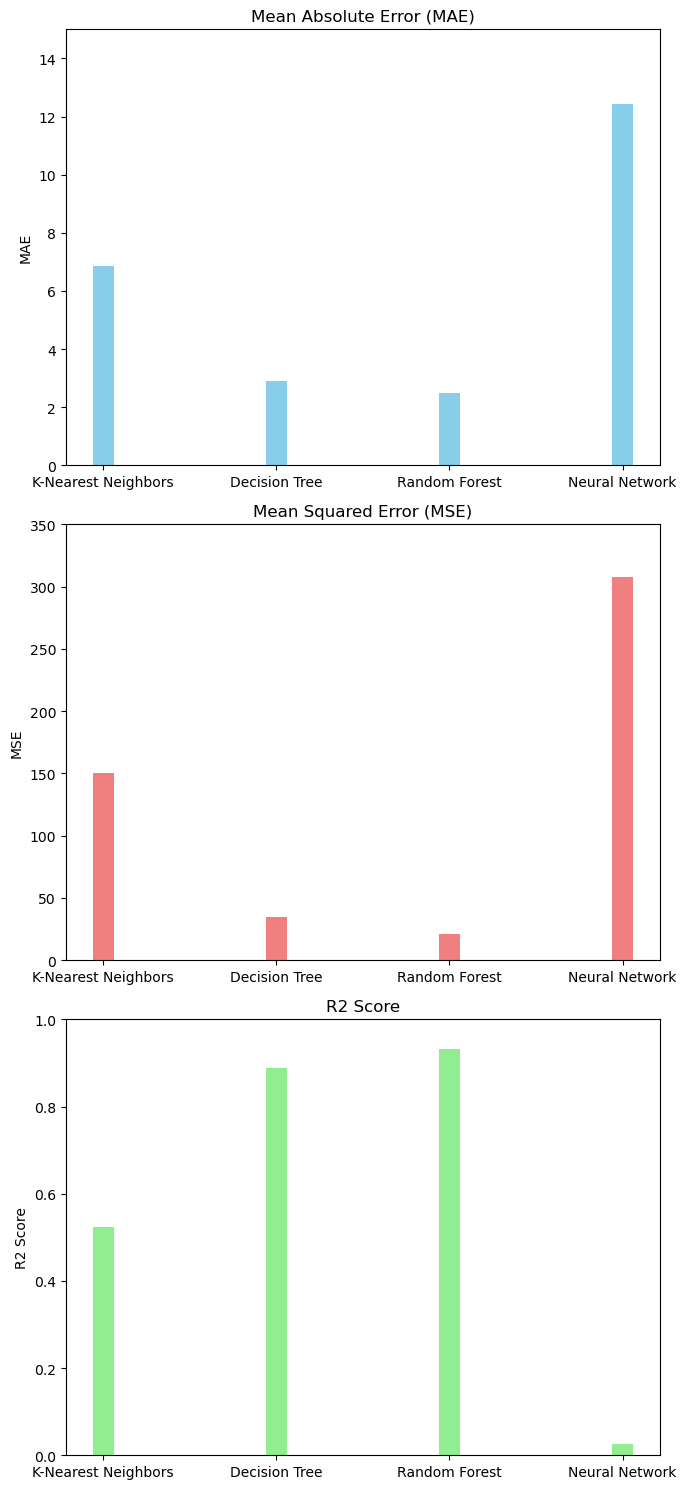

In [50]:
# Define the models' metrics
models = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest','Neural Network']
mae_values = [6.846579,2.885970 ,2.487973 ,12.424838]    
mse_values = [150.445041, 34.870907,21.362971 ,307.55062]  
r2_values = [0.522971,0.889431 , 0.932262,  0.024823]  

# Set positions of the x-axis
x = np.arange(len(models))

# Set width of the bars
width = 0.12

# Create subplots for MAE, MSE, and R2 Score
fig, ax = plt.subplots(3, 1, figsize=(7, 15))

# Plot Mean Absolute Error (MAE)
ax[0].bar(x, mae_values, color='skyblue', width=width)
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel('MAE')
ax[0].set_ylim([0, 15])  # Adjust y-axis to focus on lower values

# Plot Mean Squared Error (MSE)
ax[1].bar(x, mse_values, color='lightcoral', width=width)
ax[1].set_title('Mean Squared Error (MSE)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylabel('MSE')
ax[1].set_ylim([0,350])  # Adjust y-axis to focus on lower values

# Plot R2 Score
ax[2].bar(x, r2_values, color='lightgreen', width=width)
ax[2].set_title('R2 Score')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].set_ylabel('R2 Score')
ax[2].set_ylim([0, 1])  # Adjust y-axis to focus on lower values

# Show the plots
plt.tight_layout()
plt.show()

In [51]:
future_data_2025 = new_dataset[['Year', 'City', 'Population (in Lakhs) (2011)+', 'Type']].copy()
future_data_2025['Year'] = 2025
future_data_2025['Population (in Lakhs) (2011)+'] *= 1.02 

In [52]:
# Predict the crime rate for the new data (2025)
predicted_crime_rate_2025 = model4.predict(future_data_2025[new_dataset.columns[0:4]].values)


# Adding predictions to the future_data_2025 DataFrame
future_data_2025['Predicted Crime Rate'] = predicted_crime_rate_2025

print(future_data_2025[['City', 'Type', 'Predicted Crime Rate']])

      City  Type  Predicted Crime Rate
0        0     9              1.454606
1        0     9              1.454606
2        0     9              1.454606
3        0     9              1.454606
4        0     9              1.454606
...    ...   ...                   ...
1515    18     6              7.203911
1516    18     6              7.203911
1517    18     6              7.203911
1518    18     6              7.203911
1519    18     6              7.203911

[1520 rows x 3 columns]


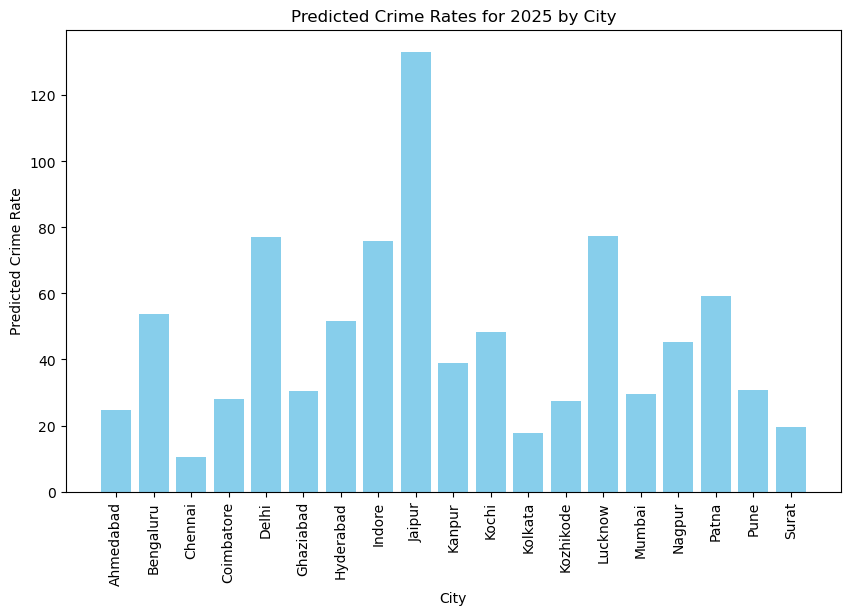

In [53]:
# Step 1: Load the city mapping from the file
city_mapping = {}
with open('Mappings/City_Mapping.txt', 'rt') as file:
    for line in file:
        key, val = line.strip().split(" - ")
        city_mapping[int(val)] = key  # Reverse mapping: numeric -> city name

# Step 2: Map back the encoded city labels to their original names
future_data_2025['City'] = future_data_2025['City'].map(city_mapping)

# Step 3: Plot the graph with city names
plt.figure(figsize=(10, 6))
plt.bar(future_data_2025['City'], future_data_2025['Predicted Crime Rate'], color='skyblue')
plt.title("Predicted Crime Rates for 2025 by City")
plt.ylabel("Predicted Crime Rate")
plt.xlabel("City")
plt.xticks(rotation=90)  # Rotate city names for better visibility
plt.show()